In [2]:
import fix_yahoo_finance as yf  
import pandas as pd 
import numpy as np 
import networkx as nx
import scipy.special 
pd.core.common.is_list_like = pd.api.types.is_list_like 
import pandas_datareader as pdr 
from matplotlib import pyplot as plt
from datetime import date, datetime
import math
import random
import matplotlib.pyplot as plt
from tools.comparisons import *
from tools.data_transform import *
from hypotheses.sign_statistics import *
from hypotheses.sign_tests import *
from distributions.multivariate_normal import get_norm_seq
from distributions.multivariate_t import get_Student_seq

# from plotly.offline import iplot
# import plotly.graph_objs as go
# yf.pdr_override() 

In [7]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.5, 0, 0, 0, 0],\
        [0.5, 1, 0.5, 0, 0, 0],\
        [0, 0.5, 1, 0.5, 0, 0],\
        [0, 0, 0.5, 1, 0.5, 0],\
        [0, 0, 0, 0.5, 1, 0.5],\
        [0, 0, 0, 0, 0.5, 1]]

In [8]:
corr = np.corrcoef(get_norm_seq(corr, 1000))
corr

array([[ 1.        ,  0.49428544,  0.04362544,  0.06048483,  0.02063573,
         0.02036817],
       [ 0.49428544,  1.        ,  0.5233129 ,  0.0032962 , -0.00898492,
        -0.0025412 ],
       [ 0.04362544,  0.5233129 ,  1.        ,  0.4850049 ,  0.00665346,
        -0.01433121],
       [ 0.06048483,  0.0032962 ,  0.4850049 ,  1.        ,  0.49601177,
        -0.00890151],
       [ 0.02063573, -0.00898492,  0.00665346,  0.49601177,  1.        ,
         0.50242899],
       [ 0.02036817, -0.0025412 , -0.01433121, -0.00890151,  0.50242899,
         1.        ]])

In [37]:
St = get_Student_seq(corr, 1, 1000)
St[0]

array([ 2.78902007e+00, -2.73586227e+00, -3.25168383e+00, -4.14582804e+00,
        7.49150905e-01,  4.42278440e+00, -1.88853255e+00,  8.96633580e-01,
       -2.90763007e+00, -1.95991899e-01, -2.88414988e+00,  2.63166603e+00,
        8.34591039e-01, -4.57914704e+00,  1.88622261e+00, -1.89699951e+00,
       -5.13295142e-01, -2.67325284e+01, -7.55053590e-01, -5.64977249e-01,
       -1.22402177e+00,  9.32944149e-01, -2.64706899e-02,  2.89875941e+00,
        5.68533556e+00,  8.54088330e-01, -1.06763647e-01,  9.28395353e-01,
        2.81203940e+00,  2.09162144e-01, -1.85903496e+00, -1.31386523e+00,
        1.41327124e+00, -3.21426317e+00,  1.40719001e+00, -1.08405944e+00,
       -2.63432888e-01,  4.18420062e-01,  4.59383575e-01,  1.07347942e+00,
       -2.40212526e+00, -4.82877625e-01, -4.04469871e+01,  2.53230940e+00,
       -2.60643292e+00, -1.10814752e+00, -4.08652942e-01,  2.17093831e+01,
        9.16012370e-01,  2.93329634e+00,  8.52185863e-01, -1.77181422e+00,
       -4.03234175e-01, -

In [38]:
print(np.mean(St[0]))
print(np.max(St[0]))
print(np.min(St[0]))

-1.50496146365902
213.61917770900493
-1714.3442379413673


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-1714.34423794, -1713.95443539, -1713.56463284, ...,
          212.83957261,   213.22937516,   213.61917771]),
 <a list of 4946 Patch objects>)

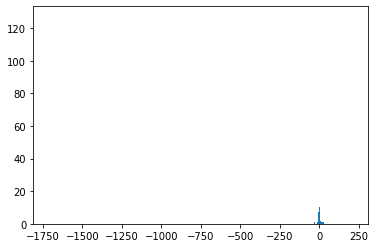

In [39]:
plt.hist(St[0], bins='auto')

In [31]:
norm = get_norm_seq(corr, 1000)
norm[0]

array([ 1.17775154e+00, -4.65471124e-01, -5.03486727e-01, -1.92532597e+00,
       -6.27483945e-01, -5.61055116e-01,  9.23658822e-01, -9.31899544e-02,
       -5.08467330e-01,  3.54091708e-01,  7.13594435e-01,  2.16185020e+00,
       -1.32871268e+00,  4.66591593e-01, -1.56624034e-01, -1.59901793e+00,
        1.25802693e+00,  9.87903839e-01,  2.48971631e+00, -3.53250551e-01,
        1.06180127e+00,  6.99499474e-01, -1.44832904e+00,  4.62924902e-01,
       -1.05664414e+00,  1.07447029e-01, -2.17076343e-01,  2.25396895e+00,
       -2.07578529e-01, -6.42945954e-01, -1.05077239e+00, -1.00538067e+00,
        1.08594395e+00,  6.90113905e-01,  7.54661960e-01,  1.20420110e+00,
        3.47066404e-02,  7.41454106e-01, -3.97187258e-01, -4.28897268e-01,
        1.01255510e+00,  5.30398013e-01, -8.43123094e-02, -9.78195395e-01,
       -1.37833250e+00,  8.69085230e-02,  8.17780500e-01,  3.95119587e-01,
       -7.41067308e-01,  6.70337145e-01, -1.80094975e+00,  1.81218120e+00,
       -7.50918407e-01, -

(array([  4.,   3.,   9.,  13.,  18.,  40.,  62.,  75.,  72., 108., 108.,
        112.,  80.,  90.,  63.,  66.,  23.,  25.,  14.,   7.,   5.,   3.]),
 array([-2.97764813, -2.70604442, -2.43444071, -2.162837  , -1.89123329,
        -1.61962958, -1.34802587, -1.07642216, -0.80481845, -0.53321474,
        -0.26161103,  0.00999267,  0.28159638,  0.55320009,  0.8248038 ,
         1.09640751,  1.36801122,  1.63961493,  1.91121864,  2.18282235,
         2.45442606,  2.72602977,  2.99763348]),
 <a list of 22 Patch objects>)

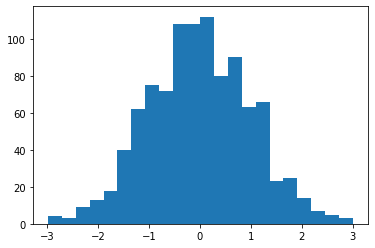

In [32]:
plt.hist(norm[0], bins='auto')

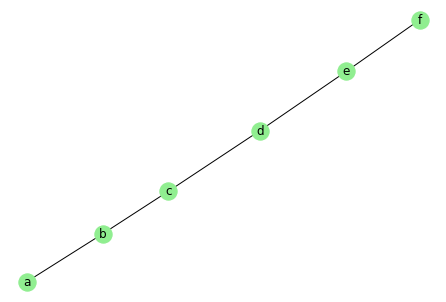

In [9]:
ref_MST1 = create_Kruskal_MST(corr, stcks)
nx.draw(ref_MST1, with_labels=True, node_color='lightgreen')

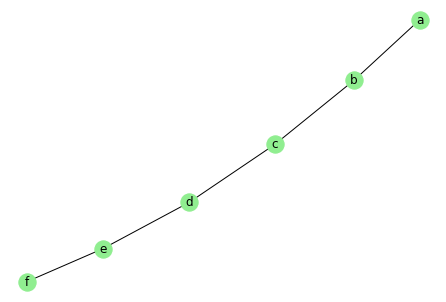

In [10]:
ref_MST2 = create_Prim_MST(corr, stcks)
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')

In [11]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Pearson', distr='normal')))

observ = 5, same = 0.104
observ = 10, same = 0.231
observ = 20, same = 0.555
observ = 100, same = 0.996
observ = 200, same = 1.0
observ = 1000, same = 1.0


In [12]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Sign', distr='normal')))

observ = 5, same = 0.011
observ = 10, same = 0.052
observ = 20, same = 0.142
observ = 100, same = 0.84
observ = 200, same = 0.987
observ = 1000, same = 1.0


In [13]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Pearson', distr='Student', dof=1)))

observ = 5, same = 0.077
observ = 10, same = 0.091
observ = 20, same = 0.116
observ = 100, same = 0.161
observ = 200, same = 0.162
observ = 1000, same = 0.153


In [14]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Sign', distr='Student', dof=1)))

observ = 5, same = 0.019
observ = 10, same = 0.058
observ = 20, same = 0.135
observ = 100, same = 0.849
observ = 200, same = 0.991
observ = 1000, same = 1.0


In [15]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Pearson', distr='Student', dof=2)))

observ = 5, same = 0.082
observ = 10, same = 0.134
observ = 20, same = 0.24
observ = 100, same = 0.464
observ = 200, same = 0.574
observ = 1000, same = 0.703


In [16]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Sign', distr='Student', dof=2)))

observ = 5, same = 0.015
observ = 10, same = 0.05
observ = 20, same = 0.147
observ = 100, same = 0.85
observ = 200, same = 0.988
observ = 1000, same = 1.0


In [17]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Pearson', distr='Student', dof=3)))

observ = 5, same = 0.112
observ = 10, same = 0.167
observ = 20, same = 0.3
observ = 100, same = 0.759
observ = 200, same = 0.85
observ = 1000, same = 0.965


In [18]:
for observ in [5, 10, 20, 100, 200, 1000]:
    print ('observ = {}, same = {}'.format(observ, compare_MSTs(ref_MST1, corr, observ, stcks, measure='Sign', distr='Student', dof=3)))

observ = 5, same = 0.012
observ = 10, same = 0.054
observ = 20, same = 0.134
observ = 100, same = 0.865
observ = 200, same = 0.991
observ = 1000, same = 1.0


#### Генерация случайных последовательностей из нормального распределния с данной матрицей корреляции и нулевым вектором математетического ожидания, построение MST по новым СВ и сравнение его с истиным MST

In [24]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.5, 0, 0, 0, 0],\
        [0.5, 1, 0.5, 0, 0, 0],\
        [0, 0.5, 1, 0.5, 0, 0],\
        [0, 0, 0.5, 1, 0.5, 0],\
        [0, 0, 0, 0.5, 1, 0.5],\
        [0, 0, 0, 0, 0.5, 1]]

corr = np.corrcoef(get_norm_seq(corr, 1000))
corr

array([[ 1.        ,  0.54553809, -0.01876853, -0.01788935,  0.0236392 ,
         0.0402324 ],
       [ 0.54553809,  1.        ,  0.47642481, -0.01268385,  0.03902735,
         0.01081176],
       [-0.01876853,  0.47642481,  1.        ,  0.50129464,  0.02993511,
         0.00416427],
       [-0.01788935, -0.01268385,  0.50129464,  1.        ,  0.51193372,
         0.06622339],
       [ 0.0236392 ,  0.03902735,  0.02993511,  0.51193372,  1.        ,
         0.53239394],
       [ 0.0402324 ,  0.01081176,  0.00416427,  0.06622339,  0.53239394,
         1.        ]])

True


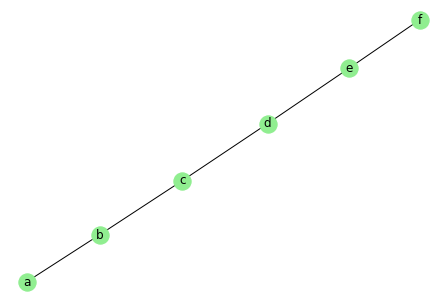

In [35]:
ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prim_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')


[[ 1.          0.49217462 -0.15820548  0.07388598  0.1411141   0.0442144 ]
 [ 0.49217462  1.          0.37885281  0.00792332  0.18221169  0.05037662]
 [-0.15820548  0.37885281  1.          0.50688949  0.07935423 -0.02482466]
 [ 0.07388598  0.00792332  0.50688949  1.          0.50256728  0.08388223]
 [ 0.1411141   0.18221169  0.07935423  0.50256728  1.          0.62596064]
 [ 0.0442144   0.05037662 -0.02482466  0.08388223  0.62596064  1.        ]]


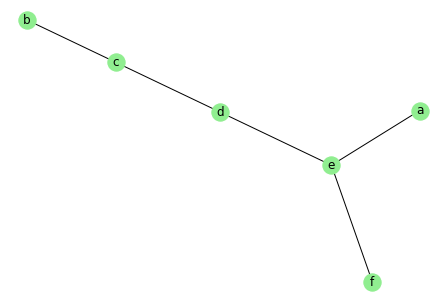

In [98]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

print(np.corrcoef(new_rets))

G = create_Prim_hypot_MST(new_inds, stcks, 0.1)
nx.draw(G, with_labels=True, node_color='lightgreen')

[[ 1.          0.50309308  0.02624538  0.08503791  0.19023782  0.08211148]
 [ 0.50309308  1.          0.38872631  0.00774981  0.10412901 -0.02709614]
 [ 0.02624538  0.38872631  1.          0.53128088  0.01455224 -0.0431596 ]
 [ 0.08503791  0.00774981  0.53128088  1.          0.52045143 -0.03155902]
 [ 0.19023782  0.10412901  0.01455224  0.52045143  1.          0.55547817]
 [ 0.08211148 -0.02709614 -0.0431596  -0.03155902  0.55547817  1.        ]]


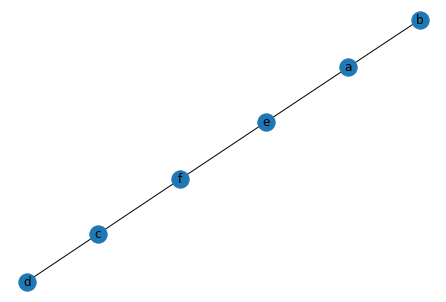

In [76]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.1, kind_of_test='complex_rand')
nx.draw(G, with_labels=True, node_color='lightgreen')

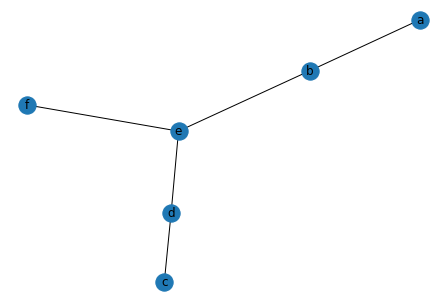

In [77]:
G = create_hypot_MST(new_inds, stcks, 0.1, kind_of_test='complex_max')
nx.draw(G, with_labels=True, node_color='lightgreen')

##### Compare procedures


In [80]:
compare_procedures(ref_MST1, 1000, alphas=[0.1, 0.05])

alpha =  0.1
observations number = 100 
       rate of the same: 
       procedure of correlation: 1.0 
       simple hypothetical procedure: 0.285 
       complex (rand) hypothetical procedure: 0.343 
       complex (max) hypothetical procedure: 0.226
alpha =  0.05
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.998 
       simple hypothetical procedure: 0.116 
       complex (rand) hypothetical procedure: 0.171 
       complex (max) hypothetical procedure: 0.075


##### Continue

In [105]:
stcks = ['a', 'b', 'c', 'd', 'e', 'f']
corr = [[1, 0.4, 0.4, 0.4, 0.4, 0.4],\
        [0.4, 1, 0, 0, 0, 0],\
        [0.4, 0, 1, 0, 0, 0],\
        [0.4, 0, 0, 1, 0, 0],\
        [0.4, 0, 0, 0, 1, 0],\
        [0.4, 0, 0, 0, 0, 1]]

corr = np.corrcoef(get_norm_seq(corr, 1000))
corr

array([[ 1.        ,  0.39642882,  0.42914849,  0.4096508 ,  0.38071016,
         0.39235979],
       [ 0.39642882,  1.        ,  0.01667509,  0.01108808, -0.01209208,
         0.03646753],
       [ 0.42914849,  0.01667509,  1.        , -0.01124587,  0.04733709,
         0.01561915],
       [ 0.4096508 ,  0.01108808, -0.01124587,  1.        , -0.03751969,
        -0.03019067],
       [ 0.38071016, -0.01209208,  0.04733709, -0.03751969,  1.        ,
        -0.04071938],
       [ 0.39235979,  0.03646753,  0.01561915, -0.03019067, -0.04071938,
         1.        ]])

True


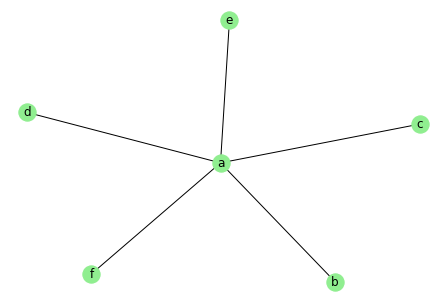

In [106]:
ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prim_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')


[[ 1.          0.45321349  0.31646235  0.37859746  0.46475053  0.27088343]
 [ 0.45321349  1.          0.1317517  -0.12576714  0.0760405  -0.00814774]
 [ 0.31646235  0.1317517   1.         -0.15363147 -0.10916006 -0.04615368]
 [ 0.37859746 -0.12576714 -0.15363147  1.          0.20654125 -0.15234482]
 [ 0.46475053  0.0760405  -0.10916006  0.20654125  1.         -0.1724195 ]
 [ 0.27088343 -0.00814774 -0.04615368 -0.15234482 -0.1724195   1.        ]]


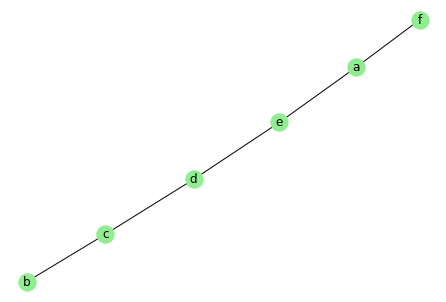

In [137]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

print(np.corrcoef(new_rets))

G = create_Prim_hypot_MST(new_inds, stcks, 0.1)
nx.draw(G, with_labels=True, node_color='lightgreen')

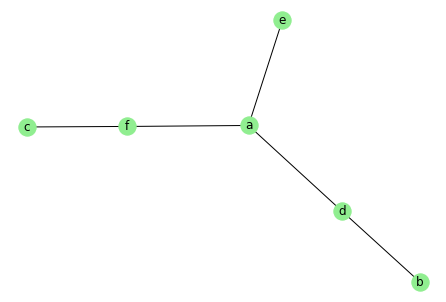

In [139]:
G = nx.Graph()
G.add_edge('a', 'e')
G.add_edge('a', 'd')
G.add_edge('a', 'f')
G.add_edge('f', 'c')
G.add_edge('d', 'b')
nx.draw(G, with_labels=True, node_color='lightgreen')

In [113]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_rand')
nx.draw(G, with_labels=True, node_color='lightgreen')

[[ 1.          0.32678597  0.34946424  0.40409597  0.33751896  0.4704358 ]
 [ 0.32678597  1.         -0.13202021  0.17038271 -0.22666064  0.0090964 ]
 [ 0.34946424 -0.13202021  1.         -0.08902569  0.05331283  0.04442181]
 [ 0.40409597  0.17038271 -0.08902569  1.         -0.0694704  -0.14299995]
 [ 0.33751896 -0.22666064  0.05331283 -0.0694704   1.          0.05521075]
 [ 0.4704358   0.0090964   0.04442181 -0.14299995  0.05521075  1.        ]]


NameError: name 'create_hypot_MST' is not defined

[[ 1.          0.41244269  0.36145384  0.29177373  0.41903777  0.45604584]
 [ 0.41244269  1.          0.03665534 -0.02150926 -0.06745997 -0.02678325]
 [ 0.36145384  0.03665534  1.         -0.18445846  0.05544319  0.21929171]
 [ 0.29177373 -0.02150926 -0.18445846  1.         -0.03854574 -0.1076604 ]
 [ 0.41903777 -0.06745997  0.05544319 -0.03854574  1.          0.04676406]
 [ 0.45604584 -0.02678325  0.21929171 -0.1076604   0.04676406  1.        ]]


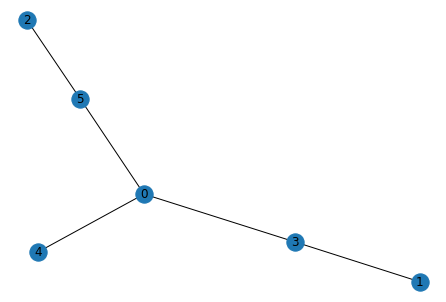

In [84]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_max')
nx.draw(G, with_labels=True, node_color='lightgreen')


##### Compare procedures

In [85]:
compare_procedures(ref_MST1, 1000, alphas=[0.1, 0.05])

alpha =  0.1
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.998 
       simple hypothetical procedure: 0.032 
       complex (rand) hypothetical procedure: 0.098 
       complex (max) hypothetical procedure: 0.014
alpha =  0.05
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.999 
       simple hypothetical procedure: 0.003 
       complex (rand) hypothetical procedure: 0.048 
       complex (max) hypothetical procedure: 0.001


##### Continue

True


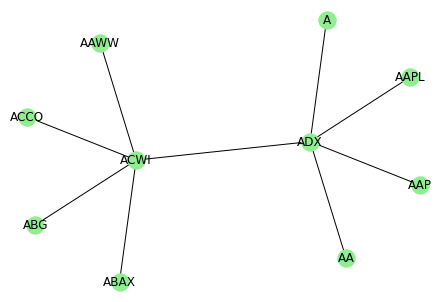

In [141]:
corr = [[1.0000, 0.7220, 0.4681, 0.4809, 0.6209, 0.5380, 0.6252, 0.6285, 0.7786, 0.7909], \
        [0.7220, 1.0000, 0.4395, 0.5979, 0.6381, 0.5725, 0.6666, 0.6266, 0.8583, 0.8640], \
        [0.4681, 0.4395, 1.0000, 0.3432, 0.3468, 0.2740, 0.4090, 0.4016, 0.4615, 0.4832], \
        [0.4809, 0.5979, 0.3432, 1.0000, 0.4518, 0.4460, 0.4635, 0.4940, 0.6447, 0.6601], \
        [0.6209, 0.6381, 0.3468, 0.4518, 1.0000, 0.5640, 0.5994, 0.5369, 0.7170, 0.7136], \
        [0.5380, 0.5725, 0.2740, 0.4460, 0.5640, 1.0000, 0.4969, 0.4775, 0.6439, 0.6242], \
        [0.6252, 0.6666, 0.4090, 0.4635, 0.5994, 0.4969, 1.0000, 0.6098, 0.7161, 0.7158], \
        [0.6285, 0.6266, 0.4016, 0.4940, 0.5369, 0.4775, 0.6098, 1.0000, 0.6805, 0.6748], \
        [0.7786, 0.8583, 0.4615, 0.6447, 0.7170, 0.6439, 0.7161, 0.6805, 1.0000, 0.9523], \
        [0.7909, 0.8640, 0.4832, 0.6601, 0.7136, 0.6242, 0.7158, 0.6748, 0.9523, 1.0000]]

stcks = ['A', 'AA', 'AAP', 'AAPL', 'AAWW', 'ABAX', 'ACCO', 'ABG', 'ACWI', 'ADX']

ref_MST1 = create_Kruskal_MST(corr, stcks)

ref_MST2 = create_Prim_MST(corr, stcks)

print(sorted(ref_MST1.degree) == sorted(ref_MST2.degree))
nx.draw(ref_MST2, with_labels=True, node_color='lightgreen')

[[1.         0.73920708 0.46685806 0.495204   0.62439867 0.4595344
  0.61234879 0.60863863 0.78985027 0.80112362]
 [0.73920708 1.         0.46453513 0.62315776 0.68290742 0.63259896
  0.64074354 0.66174907 0.90087907 0.88442963]
 [0.46685806 0.46453513 1.         0.45092475 0.31135524 0.19603418
  0.32458315 0.53090008 0.49423077 0.49099396]
 [0.495204   0.62315776 0.45092475 1.         0.47207    0.45484354
  0.57901854 0.53292897 0.6801327  0.67533177]
 [0.62439867 0.68290742 0.31135524 0.47207    1.         0.63396453
  0.52616061 0.54996333 0.73131116 0.73429099]
 [0.4595344  0.63259896 0.19603418 0.45484354 0.63396453 1.
  0.4801786  0.36583879 0.60835093 0.60471249]
 [0.61234879 0.64074354 0.32458315 0.57901854 0.52616061 0.4801786
  1.         0.59640972 0.67424916 0.68010081]
 [0.60863863 0.66174907 0.53090008 0.53292897 0.54996333 0.36583879
  0.59640972 1.         0.71230993 0.70199291]
 [0.78985027 0.90087907 0.49423077 0.6801327  0.73131116 0.60835093
  0.67424916 0.7123099

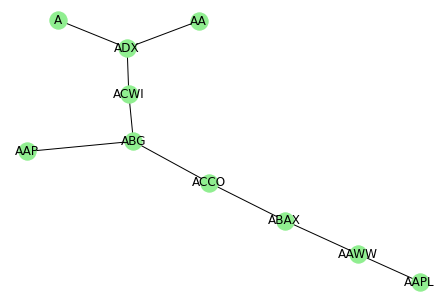

In [149]:
new_rets = get_norm_seq(corr, 100)
new_inds = get_inds_matrix(new_rets)

print(np.corrcoef(new_rets))

G = create_Prim_hypot_MST(new_inds, stcks, 0.15)
nx.draw(G, with_labels=True, node_color='lightgreen')

In [0]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_rand')
nx.draw(G, with_labels=True)

In [0]:
print(np.corrcoef(new_rets))

G = create_hypot_MST(new_inds, stcks, 0.15, kind_of_test='complex_max')
nx.draw(G, with_labels=True)

###### Compare procedures

In [73]:
compare_procedures(ref_MST1, 1000, alphas=[0.1, 0.05])

alpha =  0.1
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.068 
       simple hypothetical procedure: 0.0 
       complex (rand) hypothetical procedure: 0.0 
       complex (max) hypothetical procedure: 0.0
alpha =  0.05
observations number = 100 
       rate of the same: 
       procedure of correlation: 0.066 
       simple hypothetical procedure: 0.0 
       complex (rand) hypothetical procedure: 0.0 
       complex (max) hypothetical procedure: 0.0


##### Continue

In [19]:
X = [1, 2, 3]
Y = [5, 3, 8]

np.corrcoef(X, Y)

array([[1.        , 0.59603956],
       [0.59603956, 1.        ]])

In [22]:
np.sqrt(27)/np.sqrt(76)

0.5960395606792697